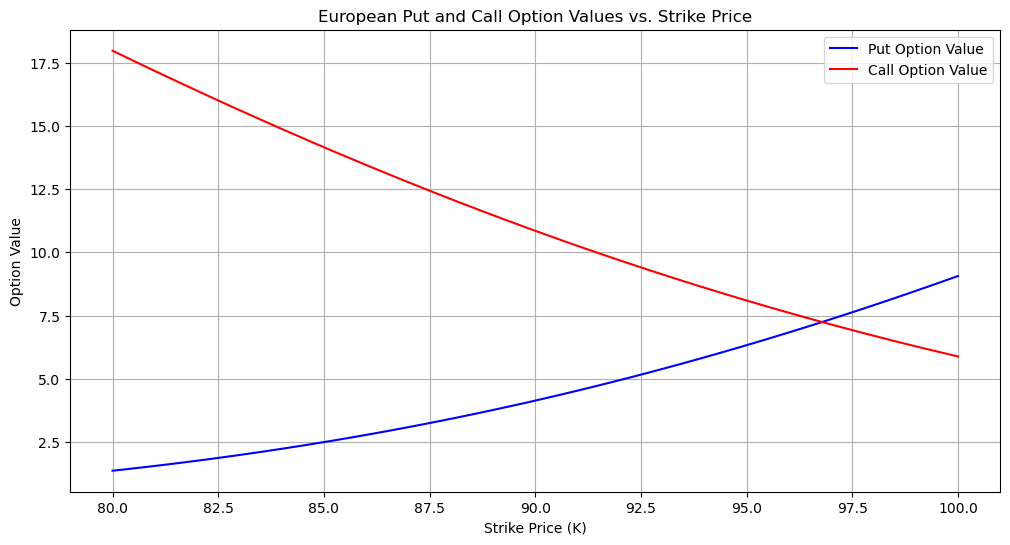

(6.087462916770384, 0.20000040756118836)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import brentq

# EXERCISE 6 Consider a stock with price V1 governed by the SDE  # dV1 t = 1VV1tdt + 1VV1tdW1t

# where 1V and 1V are constants and W1 is a Brownian motion. Suppose 1V = 016
#and 1V = 038, and that the risk-free rate of interest is r = 43%. Let todays stock price be V10 = 9575.

#1. What is the price of a European put option written on V1 that expires in a quarter of a year, if the strike price is 94.5?
#2. Plot the value of the European put and the equivalent call when the strike price varies from 80 to 100.
#3. Consider another stock with a price following the geometric Brownian motion dV2 t = 2VV2tdt + 2VV2tdW2t. 
#The current price is 132. Assume 2V = 018 and that a European call option with six months to expiration is traded at the price 8.8506. 
#What is the implied volatility of the stock?


# Given data for Part 1
V1_0 = 95.75          # Current stock price
K_put = 94.5          # Strike price for the put
T_put = 0.25          # Time to expiration (quarter of a year)
r = 0.043             # Risk-free rate
sigma1_V = 0.38       # Volatility of stock V1

# Black-Scholes formulas for European Put
def black_scholes_put(V, K, T, r, sigma):
    d1 = (np.log(V / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    put_price = K * np.exp(-r * T) * norm.cdf(-d2) - V * norm.cdf(-d1)
    return put_price

# Calculate the European put price for given parameters
put_price = black_scholes_put(V1_0, K_put, T_put, r, sigma1_V)

# Part 2: Plot put and call option values for strike prices between 80 and 100
K_values = np.linspace(80, 100, 50)
put_values = [black_scholes_put(V1_0, K, T_put, r, sigma1_V) for K in K_values]
call_values = [black_scholes_call(V1_0, K, T_put, r, sigma1_V) for K in K_values]

# Part 3: Calculate implied volatility for the second stock V2
V2_0 = 132            # Current price of stock V2
market_call_price = 8.8506  # Market price of the call option on V2
T_call = 0.5          # Time to expiration for the call (six months)

# Define Black-Scholes call option formula to calculate implied volatility
def black_scholes_call(V, K, T, r, sigma):
    d1 = (np.log(V / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = V * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Function to find implied volatility by minimizing the difference with market call price
def implied_volatility_call(V, K, T, r, market_price):
    func = lambda sigma: black_scholes_call(V, K, T, r, sigma) - market_price
    implied_vol = brentq(func, 0.01, 2.0)  # Use a reasonable range for sigma
    return implied_vol

# Assume a reasonable strike price K_call for V2 to find implied volatility
K_call = 132  # Assuming at-the-money strike for simplicity
implied_vol_V2 = implied_volatility_call(V2_0, K_call, T_call, r, market_call_price)

# Plotting the European put and call option values
plt.figure(figsize=(12, 6))
plt.plot(K_values, put_values, label='Put Option Value', color='blue')
plt.plot(K_values, call_values, label='Call Option Value', color='red')
plt.xlabel('Strike Price (K)')
plt.ylabel('Option Value')
plt.title('European Put and Call Option Values vs. Strike Price')
plt.legend()
plt.grid(True)
plt.show()

put_price, implied_vol_V2




